# Proyecto Analítica
## Juan Ignacio Arguello, Sebastián Jácome & Isabela González
## USFQ

## 1.1-1.2 Limpieza de datos

In [1]:
#Importar librerias 

%matplotlib inline
from pathlib import Path

#!pip install dmba
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary
import seaborn as sns


no display found. Using non-interactive Agg backend


In [2]:
#Importar base de datos 
df = pd.read_csv('PublicHospitalDataset.csv',encoding='cp1252')

#Impresion de las primeras filas 
df.head()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1


In [3]:
#Tamaño de la base de datos 
df.shape

(5110, 11)

In [4]:
#Ver las métricas estadisticas
df.describe()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,61.463720,43.226614,0.048728
std,0.296607,0.226063,45.283560,1140.662468,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.500000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.100000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,33.100000,61.000000,0.000000
max,1.000000,1.000000,271.740000,40000.000000,82.000000,1.000000


In [5]:
#Tipo de datos 
df.dtypes

Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Stroke                 int64
dtype: object

In [6]:
#Unicamente la columna Bmi tiene valores nulos 
#Llenamos los valores nulos con la mediana (valores nulos=201)
medianBmi = df['Bmi'].median()
df.Bmi = df.Bmi.fillna(value=medianBmi)


In [7]:
#Tamaño después de eliminación de valores nulos
df.shape

(5110, 11)

In [8]:
#Analizamos la desviación estandar para identificar valores atipicos
#Se elimina valores atipicos en Bmi
df = df[df["Bmi"] < 150]
# Se eliminan los valores atípicos de la columna Bmi, para esto se investigó en internet y se encontró que el
# Record Guiness de Bmi es de aproximadamente 150 por lo que se eliminan los valores mayores a 150, ya que valores
# mayores a este no son reales, o hubo un error de typeo en la base de datos.

In [9]:
#Ver el tamaño de la muestra después de eliminar los valores atípicos en Bmi(4)
df.shape

(5106, 11)

In [10]:
#Eliminación de decimales en la columna Age  
df = df[df['Age'].apply(lambda x: x % 1 == 0)]

In [11]:
#Ver observaciones dentro de la columna Age y cambiar el tipo de dato a entero
df = df.astype({"Age": int})

In [12]:
#Ver tipo de datos
df.dtypes

Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                    int64
Stroke                 int64
dtype: object

In [13]:
#Eliminar valores no tienen sentido dentro de la columna Work
df = df[df['Work'].str.contains('k–sdh-k|sdsd-i|dsfsdf|sdfsdf')==False]

In [14]:
#Eliminar valores que no tienen sentido dentro de la columna Gender
#en este caso other ya que solo hay un dato y se lo puede considerar atípicos
df = df[df['Gender'].str.contains('Other')==False]

In [15]:
#Ver tamaño del data frame después de la eliminación de los valores que no tienen sentido
df.shape

(4983, 11)

In [16]:
#ver métricas estadisticas para comprara la desviación estandar y chequear que no hayan otros datos atípicos
df.describe()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,0.099739,0.055188,106.414614,29.092494,44.205298,0.049368
std,0.299682,0.228369,45.565894,7.615408,21.934929,0.216657
min,0.000000,0.000000,55.120000,11.300000,1.000000,0.000000
25%,0.000000,0.000000,77.360000,24.100000,27.000000,0.000000
50%,0.000000,0.000000,91.950000,28.100000,45.000000,0.000000
75%,0.000000,0.000000,114.170000,32.900000,61.000000,0.000000
max,1.000000,1.000000,271.740000,97.600000,82.000000,1.000000


## Preprocesamiento

In [17]:
#Imoresión de las primeras filas del data frame 
df.head()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,1
1,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,Female,61,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,1


In [18]:
#Crear variables categóricas a dummies 
df2 = pd.get_dummies(df, prefix_sep='_', drop_first=True)


In [19]:
#Ver los keys para asegurarse que se crearion bien las variables dummies
df2.keys()

Index(['Hypertension', 'Heart Disease', 'Avg_glucose_level', 'Bmi', 'Age',
       'Stroke', 'Married_Yes', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'Residence_Urban',
       'Smoking_formerly smoked', 'Smoking_never smoked', 'Smoking_smokes',
       'Gender_Male'],
      dtype='object')

## 1.3 Correlaciones 

In [20]:
# Correlaciones de las variables predictivas con la de respuesta 
corr_matrix = df2.corr()
print(corr_matrix["Stroke"].sort_values(ascending=False))

Stroke                     1.000000
Age                        0.247105
Heart Disease              0.131538
Avg_glucose_level          0.131186
Hypertension               0.128185
Married_Yes                0.104170
Smoking_formerly smoked    0.064068
Work_Self-employed         0.061564
Bmi                        0.030383
Residence_Urban            0.015008
Gender_Male                0.012324
Smoking_smokes             0.007995
Work_Private               0.005815
Smoking_never smoked      -0.007939
Work_Never_worked         -0.015175
Work_children             -0.079073
Name: Stroke, dtype: float64


## 1.4 Visualizacion distribuciones

In [21]:
#Hipertensión
# Crear el gráfico de barras
sns.countplot(x='Hypertension', data=df)
plt.title('Distribución de Hypertension')
# Mostrar el gráfico
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/293461330.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [22]:
#Heart Disease
# Crear el gráfico de barras
sns.countplot(x='Heart Disease', data=df)
plt.title('Distribución de Heart Disease')
# Mostrar el gráfico
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/214478459.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [23]:
# Married
sns.countplot(x='Married', data=df)
plt.title('Distribución de Married')
# Mostrar el gráfico
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/2660877358.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [24]:
# Work
sns.countplot(x='Work', data=df)
plt.title('Distribución de Work')
# Mostrar el gráfico
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/1291503113.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [25]:
#Residence
sns.countplot(x='Residence', data=df)
plt.title('Distribución de Residence')
# Mostrar el gráfico
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/2335682864.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [26]:
#Avg_glucose_level
# Crear un histograma de la columna "avg_glucose_level"
plt.hist(df['Avg_glucose_level'], bins=13) #calculo de bins por formula de Sturges
# Añadir etiquetas y títulos
plt.xlabel('Avg_glucose_level')
plt.ylabel('Frecuencia')
plt.title('Distribución de Avg_glucose_level')
# Mostrar el histograma
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/4007368367.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [27]:
#Bmi
# Crear un histograma de la columna "edad"
plt.hist(df['Bmi'], bins=13) #calculo de bins por formula de Sturges

# Añadir etiquetas y títulos
plt.xlabel('Bmi')
plt.ylabel('Frecuencia')
plt.title('Distribución de Bmi')

# Mostrar el histograma
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/4286481280.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [28]:
#Verificación del valor p para ver la normalidad 
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#hacer este experimento reproducible
np.random.seed(1)

#generar datos aleatorios de una distribución lognormal
lognorm_dataset = df['Bmi']

#Shapiro-Wilk Test
shapiro(lognorm_dataset)

ShapiroResult(statistic=0.9476755857467651, pvalue=6.978588265303985e-39)

In [29]:
# Smoking
sns.countplot(x='Smoking', data=df)
plt.title('Distribución de Smoking')
# Mostrar el gráfico
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/3951515654.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [30]:
# Gender
sns.countplot(x='Gender', data=df)
plt.title('Distribución de Gender')
# Mostrar el gráfico
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/3998266528.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [31]:
#Age 
# Crear un histograma de la columna "edad"
plt.hist(df['Age'], bins=13) #calculo de bins por formula de Sturges

# Añadir etiquetas y títulos
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')

# Mostrar el histograma
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/3700292956.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


### Gráfica de la variable de respuesta

In [32]:
# Stroke, distribución sesgada positiva 
sns.countplot(x='Stroke', data=df)
plt.title('Distribución de Stroke')
# Mostrar el gráfico
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/2848044462.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## 2. Balanceo de datos 

### 1. SMOTE

In [33]:
#SMOTE 
#pip instalar imbalanced-learn

from imblearn.over_sampling import SMOTE

#Separar las variables predictoras de la variable respuesta
X = df2.drop('Stroke', axis=1)
y = df2['Stroke']

# Instanciar SMOTE
smote = SMOTE()

# Remuestrear los datos
X_resampled, y_resampled = smote.fit_resample(X, y)

In [34]:
# Crear una nueva base de datos con los datos remuestreados
df_SMOTE = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# Imprimir el conteo de la variable respuesta
print(df_SMOTE['Stroke'].value_counts())


1    4737
0    4737
Name: Stroke, dtype: int64


In [35]:
# Crear el gráfico de barras para la variable respuesta para ver que se hay balanceado correctamente
sns.countplot(x='Stroke', data=df_SMOTE)
plt.title('Distribución de Stroke')
# Mostrar el gráfico
plt.show()

/var/folders/ks/szv5qd5x4f5c9_6fxs3vs5vw0000gn/T/ipykernel_8377/178971688.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


### 2. Random Over Sampling

In [36]:
#Random Over Sampling
#importanción de datos 
import pandas as pd
from sklearn.utils import resample


# Cuenta el número de observaciones en cada clase 
class_counts = df2['Stroke'].value_counts()

# Escoger la clase con menoor número de observaciones
minority_class = class_counts.idxmin()

# Separar datos en clases minoritaria y mayoritaria
majority_df = df2[df2['Stroke'] != minority_class]
minority_df = df2[df2['Stroke'] == minority_class]

# Aumentar el número de observaciones de la clase minoritaria usando datos aleatorios  
minority_upsampled = resample(minority_df, 
                              replace=True,     # sample with replacement
                              n_samples=class_counts.max(),    # to match majority class
                              random_state=42)  # reproducible results

# Combinar la clase minoritaria con el conjunto de datos mayoritario
balanced_df = pd.concat([majority_df, minority_upsampled])

# Mezclar los datos 
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [37]:
#Chequear que el balanceo haya funcionado
balanced_df['Stroke'].value_counts()

0    4737
1    4737
Name: Stroke, dtype: int64

In [38]:
#Guardar dos tecnicas de balanceo
dfrs = pd.read_csv("BalanceoRandomSampling.csv")
dfs = pd.read_csv("BalanceoSMOTE.csv")

In [39]:
#Eliminar columna extra 
dfrs.drop("Unnamed: 0", inplace=True, axis=1)
dfs.drop("Unnamed: 0", inplace=True, axis=1)

In [40]:
#Importar librerias
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt

## 3. División de base de datos

In [41]:
#variables predictoras
predictors = ['Hypertension', 'Heart Disease', 'Avg_glucose_level', 'Bmi', 'Age',
        'Married_Yes', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'Residence_Urban',
       'Smoking_formerly smoked', 'Smoking_never smoked', 'Smoking_smokes',
       'Gender_Male']

#variable de respuesta
outcome = 'Stroke'

#Division entre predictores y variable respuesta para Random Oversampling
x_rs = pd.get_dummies(dfrs[predictors], drop_first=True)
y_rs = dfrs[outcome]

#Division entre predictores y variable respuesta para Smote
x_s = pd.get_dummies(dfs[predictors], drop_first=True)
y_s = dfs[outcome]

#Entrenamiento: 70%, Validación: 30%
#Se debería haber trabajado con Entrenamiento 70%, Validación 15% y Test 15%

#entrenamiento y validación RO
train_x_rs, valid_x_rs, train_y_rs, valid_y_rs = train_test_split(x_rs, y_rs, test_size=0.3, random_state=1)
#valid_x_rs, valid_y_rs, test_x_rs, test_y_rs = train_test_split(valid_x_rs, valid_y_rs, test_size=0.5, random_state=1)

#entrenamiento y validación Smothe
train_x_s, valid_x_s, train_y_s, valid_y_s = train_test_split(x_s, y_s, test_size=0.3, random_state=1)
#valid_x_s, valid_y_s, test_x_s, test_y_s = train_test_split(valid_x_s, valid_y_s, test_size=0.5, random_state=1)

print('Training X RO   : ', train_x_s.shape)
print('Validation X RO: ', valid_x_s.shape)
#print('Test X RO      : ', test_x_s.shape)
print('Training Y RO   : ', train_y_s.shape)
print('Validation Y RO: ', valid_y_s.shape)
#print('Test Y RO      : ', test_y_s.shape)



Training X RO   :  (6631, 15)
Validation X RO:  (2843, 15)
Training Y RO   :  (6631,)
Validation Y RO:  (2843,)


## 4,5. Revisión de tecnicas empleadas para el balanceo de datos y aplicación del algoritmo de regresión logística

In [42]:
#Importar bibliotecas
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

### 4. Regresión Logística y compararción entre método SMOTE y Random Oversampling

In [43]:
#Regresion logistica con Smothe
lr_ros = LogisticRegression()
lr_ros.fit(train_x_s, train_y_s)
y_pred_ros = lr_ros.predict(valid_x_s)
f1_ros = f1_score(valid_y_s, y_pred_ros)

#Regresion logistica con Random oversampling
lr_smote = LogisticRegression()
lr_smote.fit(train_x_rs, train_y_rs)
y_pred_smote = lr_smote.predict(valid_x_rs)
f1_smote = f1_score(valid_y_rs, y_pred_smote)

#Impresion accuracy (F1 score)
print("F1 score with SMOTE:", f1_ros)
print("F1 score with random oversampling:", f1_smote)

#calculo de la matriz de confusion
from dmba import classificationSummary
#Matriz confusion set enternamiento
classificationSummary(train_y_s, lr_smote.predict(train_x_s))
#Matriz confusion set validacion
classificationSummary(valid_y_s, lr_smote.predict(valid_x_s))

#Se tiene una mejor predicción cuando se balancea con el método de SMOTE

F1 score with SMOTE: 0.8545262416343783
F1 score with random oversampling: 0.7959663865546219
Confusion Matrix (Accuracy 0.7788)

       Prediction
Actual    0    1
     0 2407  909
     1  558 2757
Confusion Matrix (Accuracy 0.7949)

       Prediction
Actual    0    1
     0 1061  360
     1  223 1199


/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

### Prueba t para comparar modelo Smote y RO

In [44]:
import numpy as np
from scipy.stats import ttest_ind

# select the outcome variable
outcome_variable = 'Stroke'

# calculate the mean and standard deviation for each group
smote_mean = np.mean(dfs[outcome_variable])
smote_std = np.std(dfs[outcome_variable])
random_mean = np.mean(dfrs[outcome_variable])
random_std = np.std(dfrs[outcome_variable])

# perform a t-test to compare the means of the two groups
t_statistic, p_value = ttest_ind(dfs[outcome_variable], dfrs[outcome_variable])

# print the results of the t-test
print('t-statistic:', t_statistic)
print('p-value:', p_value)

if p_value < 0.05:
    print('There is a statistically significant difference between the two groups.')
else:
    print('There is not a statistically significant difference between the two groups.')

t-statistic: 0.0
p-value: 1.0
There is not a statistically significant difference between the two groups.


In [45]:
# Se encontró que no existe diferencia estadística entre ambos métodos de balanceo; sin embargo, viendo el valor de
# accuracy se opto por usar la base de datos balanceada con Smote

### Pregunta 5

### 5.1 Método de KNN con modelo Smote

In [46]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [47]:
# generar lista para guardar las métricas obtenidas en validacion
results = []
#probar diferentes valores de k 
for k in range(1, 15):
    #inicializar la funcion
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_x_s, train_y_s)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y_s, knn.predict(valid_x_s))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

#Se escoge el k que maximiza accuracy, en este caso k = 2 con accuracy = 0.913

/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

     k  accuracy
0    1  0.912416
1    2  0.913120
2    3  0.898347
3    4  0.907492
4    5  0.891312
5    6  0.897292
6    7  0.880408
7    8  0.889553
8    9  0.872318
9   10  0.876891
10  11  0.863524
11  12  0.871614
12  13  0.856490
13  14  0.860359


/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
knn = KNeighborsClassifier(n_neighbors=2)
#ajustar  al set de entrenamiento
knn.fit(train_x_s, train_y_s)

# Returns the indices and distances to each point
distances, indices = knn.kneighbors(valid_x_s)
print(knn.predict(valid_x_s))

print('Indices', indices)

print('Distances',distances)

/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[1 1 1 ... 1 1 0]
Indices [[ 623 3601]
 [1497 6396]
 [2147 6406]
 ...
 [1854 5527]
 [ 939 3023]
 [2018 5327]]
Distances [[0.21066742 0.3623539 ]
 [0.07150768 0.08715503]
 [1.74157664 1.86938355]
 ...
 [1.37491777 1.45405173]
 [0.05106865 1.00056913]
 [2.35023403 2.89136646]]


In [49]:
#calculo de la matriz de confusion
from dmba import classificationSummary
#Matriz confusion set enternamiento
mc_knn_train = classificationSummary(train_y_s, knn.predict(train_x_s))
#Matriz confusion set validacion
mc_knn_valid = classificationSummary(valid_y_s, knn.predict(valid_x_s))

/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

Confusion Matrix (Accuracy 0.9887)

       Prediction
Actual    0    1
     0 3316    0
     1   75 3240
Confusion Matrix (Accuracy 0.9131)

       Prediction
Actual    0    1
     0 1251  170
     1   77 1345


In [50]:
# En el set de entrenamiento se tuvo un accuracy del 98% y en el set de validación del 91% usando el método de KNN

In [51]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [52]:
#Entrenamiento
#Precision
precision_knn_train=precision_score(train_y_s, knn.predict(train_x_s))
#sensibilidad
sensibilidad_knn_train=recall_score(train_y_s, knn.predict(train_x_s))
tn_knn_train, fp_knn_train, fn_knn_train, tp_knn_train = confusion_matrix(train_y_s, knn.predict(train_x_s)).ravel()
specificity_knn_train = tn_knn_train / (tn_knn_train + fp_knn_train)

#Validación
precision_knn_valid=precision_score(valid_y_s, knn.predict(valid_x_s))
#sensibilidad
sensibilidad_knn_valid=recall_score(valid_y_s, knn.predict(valid_x_s))
tn_knn_valid, fp_knn_valid, fn_knn_valid, tp_knn_valid = confusion_matrix(valid_y_s, knn.predict(valid_x_s)).ravel()
specificity_knn_valid = tn_knn_valid / (tn_knn_valid + fp_knn_valid)

/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

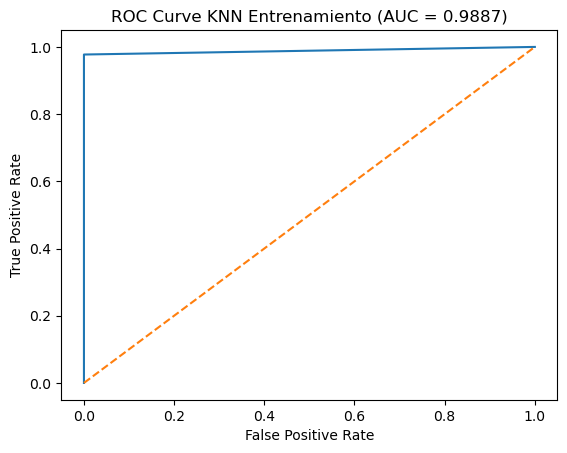

/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

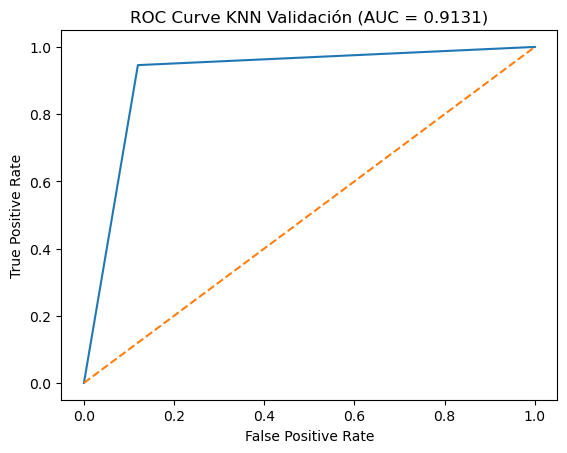

In [54]:
# AUC y ROC

#Entrenamineto
fpr, tpr, thresholds = roc_curve(train_y_s, knn.predict(train_x_s))
auc_score_knn_train = roc_auc_score(train_y_s, knn.predict(train_x_s))

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve KNN Entrenamiento (AUC = {auc_score_knn_train:.4f})')
plt.show()

#Validación
fpr, tpr, thresholds = roc_curve(valid_y_s, knn.predict(valid_x_s))
auc_score_knn_valid = roc_auc_score(valid_y_s, knn.predict(valid_x_s))

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve KNN Validación (AUC = {auc_score_knn_valid:.4f})')
plt.show()

### 5.2 Random Forest

In [55]:
%matplotlib inline
from pathlib import Path
# Importa funciones para crear árboles de decisión
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# Importa funciones para crear ensambles de árboles
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn import tree
from dmba import plotDecisionTree, classificationSummary, regressionSummary


rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_x_s, train_y_s)

RandomForestClassifier(n_estimators=500, random_state=1)

In [56]:
mc_rft_train = classificationSummary(train_y_s, rf.predict(train_x_s))
mc_rft_valid = classificationSummary(valid_y_s, rf.predict(valid_x_s))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3316    0
     1    0 3315
Confusion Matrix (Accuracy 0.9479)

       Prediction
Actual    0    1
     0 1334   87
     1   61 1361


In [57]:
#Entrenamiento
#Precision
precision_rft_train=precision_score(train_y_s, rf.predict(train_x_s))
#sensibilidad
sensibilidad_rft_train=recall_score(train_y_s, rf.predict(train_x_s))
#especificidad
tn_rft_train, fp_rft_train, fn_rft_train, tp_rft_train = confusion_matrix(train_y_s, rf.predict(train_x_s)).ravel()
specificity_rft_train = tn_rft_train / (tn_rft_train + fp_rft_train)

#Validación
precision_rft_valid=precision_score(valid_y_s, rf.predict(valid_x_s))
#sensibilidad
sensibilidad_rft_valid=recall_score(valid_y_s, rf.predict(valid_x_s))
#especificidad
tn_rft_valid, fp_rft_valid, fn_rft_valid, tp_rft_valid = confusion_matrix(valid_y_s, rf.predict(valid_x_s)).ravel()
specificity_rft_valid = tn_rft_valid / (tn_rft_valid + fp_rft_valid)

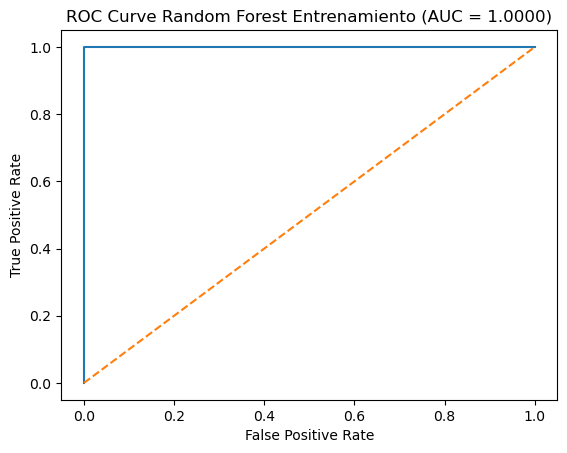

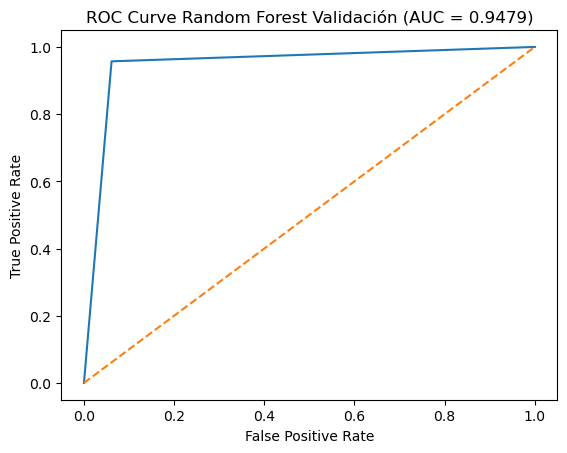

In [58]:
# AUC y ROC

#Entrenamineto
fpr, tpr, thresholds = roc_curve(train_y_s, rf.predict(train_x_s))
auc_score_rft_train = roc_auc_score(train_y_s, rf.predict(train_x_s))

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve Random Forest Entrenamiento (AUC = {auc_score_rft_train:.4f})')
plt.show()

#Validación
fpr, tpr, thresholds = roc_curve(valid_y_s, rf.predict(valid_x_s))
auc_score_rft_valid = roc_auc_score(valid_y_s, rf.predict(valid_x_s))

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve Random Forest Validación (AUC = {auc_score_rft_valid:.4f})')
plt.show()

### 5.3 Grid Search

In [59]:
# Determinar los valores de los hiperparámetros que se desean probar 
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}

# Aplica grid search utilizando validación cruzada para medir el error
gridSearch = GridSearchCV(DecisionTreeClassifier(),param_grid, cv=5)
gridSearch.fit(train_x_s, train_y_s)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8873441835142266
Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [60]:
# En base a los resultados iniciales, hace otra busqueda de los hiperparametros 
param_grid = {
    'max_depth': list(range(2, 20)), 
    'min_samples_split': list(range(10, 20)), 
    'min_impurity_decrease': [0.0, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
gridSearch.fit(train_x_s, train_y_s)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

# Devuelve el arbol que tiene la mayor exactitud 
bestClassTree = gridSearch.best_estimator_

Improved score:  0.8985050028358685
Improved parameters:  {'max_depth': 18, 'min_impurity_decrease': 0.0, 'min_samples_split': 10}


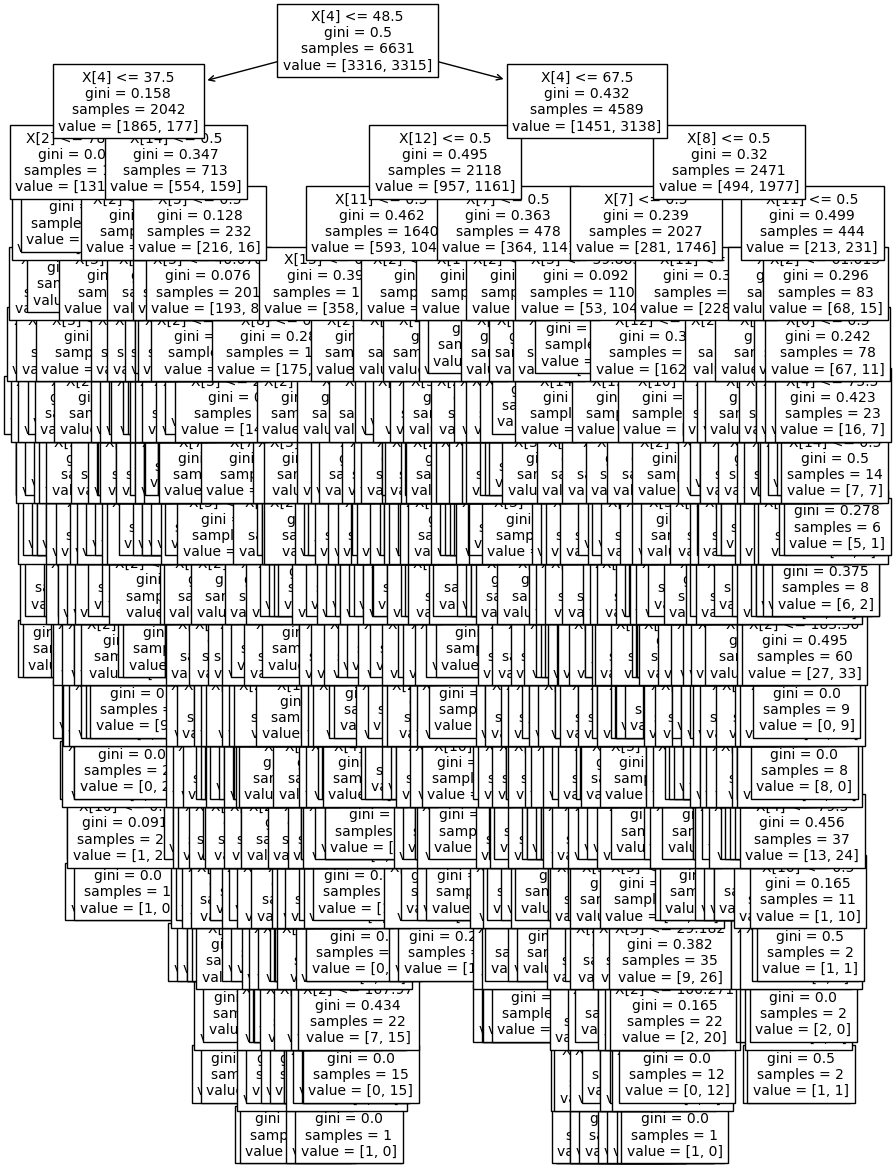

In [61]:
# Para observar el árbol
plt.figure(figsize=(10,15)) 
tree.plot_tree(bestClassTree, fontsize=10)
plt.show()

In [62]:
mc_gs_train = classificationSummary(train_y_s, bestClassTree.predict(train_x_s))
mc_gs_valid = classificationSummary(valid_y_s, bestClassTree.predict(valid_x_s))

Confusion Matrix (Accuracy 0.9703)

       Prediction
Actual    0    1
     0 3223   93
     1  104 3211
Confusion Matrix (Accuracy 0.8983)

       Prediction
Actual    0    1
     0 1260  161
     1  128 1294


In [63]:
#Entrenamiento
#Precision
precision_gs_train=precision_score(train_y_s, bestClassTree.predict(train_x_s))
#sensibilidad
sensibilidad_gs_train=recall_score(train_y_s, bestClassTree.predict(train_x_s))
#especificidad
tn_gs_train, fp_gs_train, fn_gs_train, tp_gs_train = confusion_matrix(train_y_s, bestClassTree.predict(train_x_s)).ravel()
specificity_gs_train = tn_gs_train / (tn_gs_train + fp_gs_train)

#Validación
precision_gs_valid=precision_score(valid_y_s, bestClassTree.predict(valid_x_s))
#sensibilidad
sensibilidad_gs_valid=recall_score(valid_y_s, bestClassTree.predict(valid_x_s))
#especificidad
tn_gs_valid, fp_gs_valid, fn_gs_valid, tp_gs_valid = confusion_matrix(valid_y_s, bestClassTree.predict(valid_x_s)).ravel()
specificity_gs_valid = tn_gs_valid / (tn_gs_valid + fp_gs_valid)

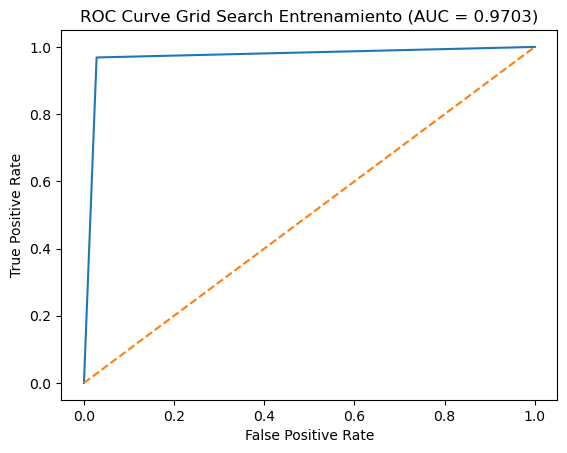

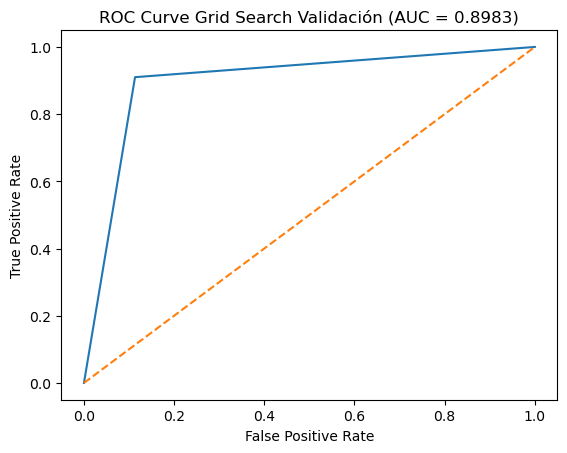

In [64]:
# AUC y ROC

#Entrenamineto
fpr, tpr, thresholds = roc_curve(train_y_s, bestClassTree.predict(train_x_s))
auc_score_gs_train = roc_auc_score(train_y_s, bestClassTree.predict(train_x_s))

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve Grid Search Entrenamiento (AUC = {auc_score_gs_train:.4f})')
plt.show()

#Validación
fpr, tpr, thresholds = roc_curve(valid_y_s, bestClassTree.predict(valid_x_s))
auc_score_gs_valid = roc_auc_score(valid_y_s, bestClassTree.predict(valid_x_s))

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve Grid Search Validación (AUC = {auc_score_gs_valid:.4f})')
plt.show()

### 5.4 Random Search

In [65]:
#importar librerias 
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# define model
#Primero, definiremos el modelo que se optimizará 
model = DecisionTreeClassifier()
# define evaluation
#Evaluaremos las configuraciones del modelo utilizando la validación cruzada de k-fold estratificada repetida con tres repeticiones y 10 pliegues.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['max_depth'] = [10, 20, 30, 40]
space['max_leaf_nodes'] = [3,10] #tiene que ser un rango definido, NO puede ser 3 a None
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=10, random_state=1)

In [66]:
# execute search
result = search.fit(train_x_s, train_y_s)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/juanignacioarguello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=500. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score: 0.8249134547238729
Best Hyperparameters: {'max_leaf_nodes': 10, 'max_depth': 10}


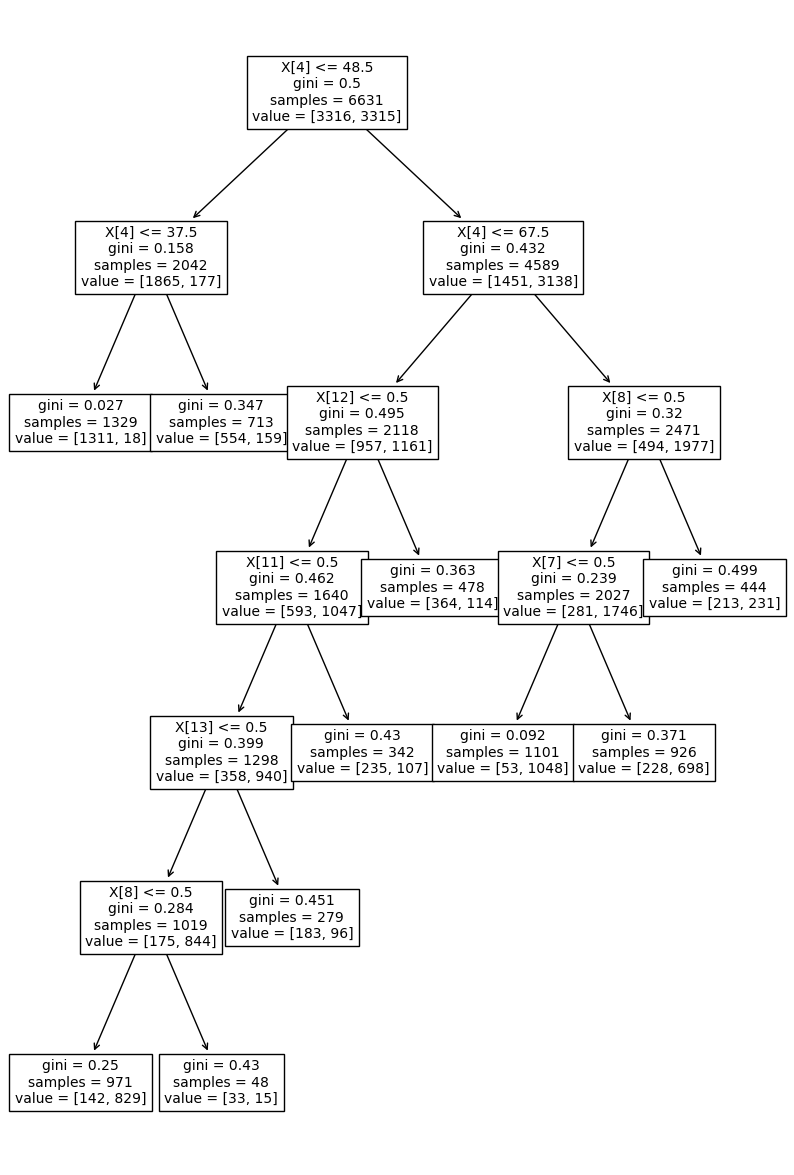

In [67]:
# Devuelve el arbol que tiene la mayor exactitud 
bestClassTree = result.best_estimator_
# Para observar el árbol
plt.figure(figsize=(10,15)) 
tree.plot_tree(bestClassTree, fontsize=10)
plt.show()

In [68]:
#MC y exactitud
mc_rs_train = classificationSummary(train_y_s, bestClassTree.predict(train_x_s))
mc_rs_valid = classificationSummary(valid_y_s, bestClassTree.predict(valid_x_s))

Confusion Matrix (Accuracy 0.8273)

       Prediction
Actual    0    1
     0 2680  636
     1  509 2806
Confusion Matrix (Accuracy 0.8294)

       Prediction
Actual    0    1
     0 1148  273
     1  212 1210


In [69]:
#Entrenamiento
#Precision
precision_rs_train=precision_score(train_y_s, bestClassTree.predict(train_x_s))
#sensibilidad
sensibilidad_rs_train=recall_score(train_y_s, bestClassTree.predict(train_x_s))
#especificidad
tn_rs_train, fp_rs_train, fn_rs_train, tp_rs_train = confusion_matrix(train_y_s, bestClassTree.predict(train_x_s)).ravel()
specificity_rs_train = tn_rs_train / (tn_rs_train + fp_rs_train)

#Validación
precision_rs_valid=precision_score(valid_y_s, bestClassTree.predict(valid_x_s))
#sensibilidad
sensibilidad_rs_valid=recall_score(valid_y_s, bestClassTree.predict(valid_x_s))
#especificidad
tn_rs_valid, fp_rs_valid, fn_rs_valid, tp_rs_valid = confusion_matrix(valid_y_s, bestClassTree.predict(valid_x_s)).ravel()
specificity_rs_valid = tn_rs_valid / (tn_rs_valid + fp_rs_valid)

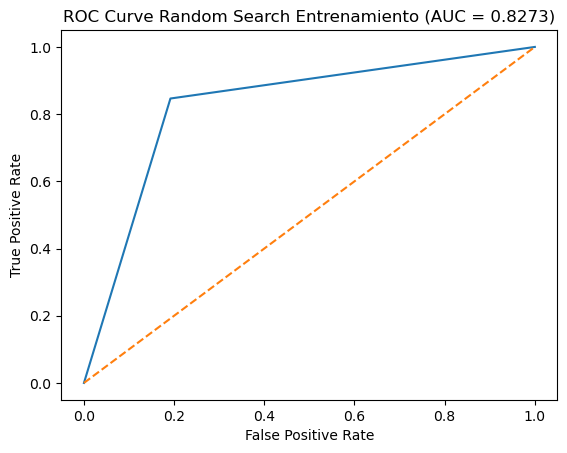

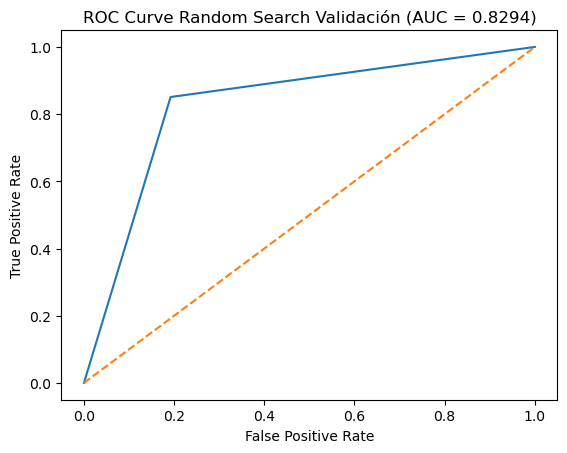

In [70]:
# AUC y ROC

#Entrenamineto
fpr, tpr, thresholds = roc_curve(train_y_s, bestClassTree.predict(train_x_s))
auc_score_rs_train = roc_auc_score(train_y_s, bestClassTree.predict(train_x_s))

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve Random Search Entrenamiento (AUC = {auc_score_rs_train:.4f})')
plt.show()

#Validación
fpr, tpr, thresholds = roc_curve(valid_y_s, bestClassTree.predict(valid_x_s))
auc_score_rs_valid = roc_auc_score(valid_y_s, bestClassTree.predict(valid_x_s))

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve Random Search Validación (AUC = {auc_score_rs_valid:.4f})')
plt.show()

### Algoritmo no dado en clase: Bagging (Ensamble)

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Define the bagging classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=10)

# Fit the model to the training data
bagging_classifier.fit(train_x_s, train_y_s)

# Make predictions on the testing data
y_pred_train = bagging_classifier.predict(train_x_s)
y_pred_valid = bagging_classifier.predict(valid_x_s)

In [73]:
#MC y exactitud
mc_bagg_train = classificationSummary(train_y_s, y_pred_train)
mc_bagg_valid = classificationSummary(valid_y_s, y_pred_valid)

Confusion Matrix (Accuracy 0.9956)

       Prediction
Actual    0    1
     0 3308    8
     1   21 3294
Confusion Matrix (Accuracy 0.9286)

       Prediction
Actual    0    1
     0 1309  112
     1   91 1331


In [74]:
#Entrenamiento
#Precision
precision_bagg_train=precision_score(train_y_s, y_pred_train)
#sensibilidad
sensibilidad_bagg_train=recall_score(train_y_s, y_pred_train)
tn_bagg_train, fp_bagg_train, fn_bagg_train, tp_bagg_train = confusion_matrix(train_y_s, y_pred_train).ravel()
#especificidad
specificity_bagg_train = tn_bagg_train / (tn_bagg_train + fp_bagg_train)

#Validación
precision_bagg_valid=precision_score(valid_y_s, y_pred_valid)
#sensibilidad
sensibilidad_bagg_valid=recall_score(valid_y_s, y_pred_valid)
#especificidad
tn_bagg_valid, fp_bagg_valid, fn_bagg_valid, tp_bagg_valid = confusion_matrix(valid_y_s, y_pred_valid).ravel()
specificity_bagg_valid = tn_bagg_valid / (tn_bagg_valid + fp_bagg_valid)

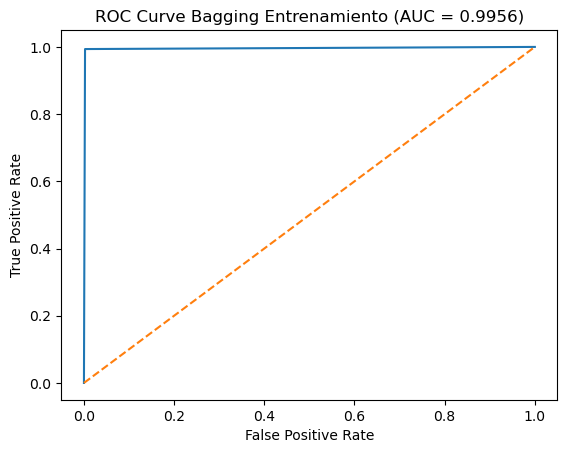

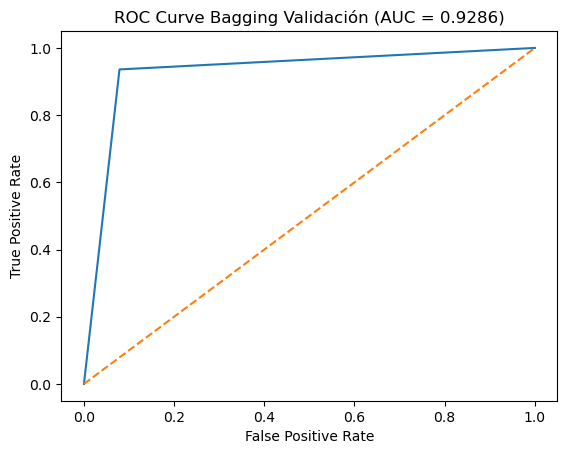

In [75]:
# AUC y ROC

#Entrenamineto
fpr, tpr, thresholds = roc_curve(train_y_s, y_pred_train)
auc_score_bagging_train = roc_auc_score(train_y_s, y_pred_train)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve Bagging Entrenamiento (AUC = {auc_score_bagging_train:.4f})')
plt.show()

#Validación
fpr, tpr, thresholds = roc_curve(valid_y_s, y_pred_valid)
auc_score_bagging_valid = roc_auc_score(valid_y_s, y_pred_valid)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve Bagging Validación (AUC = {auc_score_bagging_valid:.4f})')
plt.show()

### 6. Métricas de Evaluación

### 6.1 MC, exactitud, sensibilidad, especificidad, precisión, AUC y curva ROC

In [76]:
# KNN
print("Entrenamiento:")
print("Matriz confusion y exactitud: Revisar seccion KNN")
print("Curva ROC: Revisar seccion KNN")
print("Precision", precision_knn_train )
print("Sensibilidad", sensibilidad_knn_train )
print("Especificidad", specificity_knn_train )
print("AUC", auc_score_knn_train)

print("\n")

print("Validación")
print("Matriz confusion y exactitud: Revisar seccion KNN")
print("Curva ROC: Revisar seccion KNN")
print("Precision", precision_knn_valid )
print("Sensibilidad", sensibilidad_knn_valid )
print("Especificidad", specificity_knn_valid )
print("AUC", auc_score_knn_valid)

Entrenamiento:
Matriz confusion y exactitud: Revisar seccion KNN
Curva ROC: Revisar seccion KNN
Precision 1.0
Sensibilidad 0.9773755656108597
Especificidad 1.0
AUC 0.9886877828054299


Validación
Matriz confusion y exactitud: Revisar seccion KNN
Curva ROC: Revisar seccion KNN
Precision 0.8877887788778878
Sensibilidad 0.9458509142053446
Especificidad 0.88036593947924
AUC 0.9131084268422923


In [77]:
# Random Forest
print("Entrenamiento:")
print("Matriz confusion y exactitud: Revisar seccion Random Forest")
print("Curva ROC: Revisar seccion Random Forest")
print("Precision", precision_rft_train )
print("Sensibilidad", sensibilidad_rft_train )
print("Especificidad", specificity_rft_train )
print("AUC", auc_score_rft_train)

print("\n")

print("Validación")
print("Matriz confusion y exactitud: Revisar seccion Random Forest")
print("Curva ROC: Revisar seccion Random Forest")
print("Precision", precision_rft_valid )
print("Sensibilidad", sensibilidad_rft_valid )
print("Especificidad", specificity_rft_valid )
print("AUC", auc_score_rft_valid)

Entrenamiento:
Matriz confusion y exactitud: Revisar seccion Random Forest
Curva ROC: Revisar seccion Random Forest
Precision 1.0
Sensibilidad 1.0
Especificidad 1.0
AUC 1.0


Validación
Matriz confusion y exactitud: Revisar seccion Random Forest
Curva ROC: Revisar seccion Random Forest
Precision 0.9399171270718232
Sensibilidad 0.9571026722925458
Especificidad 0.9387755102040817
AUC 0.9479390912483138


In [78]:
# Grid Search
print("Entrenamiento:")
print("Matriz confusion y exactitud: Revisar seccion Grid Search")
print("Curva ROC: Revisar seccion Grid Search")
print("Precision", precision_gs_train )
print("Sensibilidad", sensibilidad_gs_train )
print("Especificidad", specificity_gs_train )
print("AUC", auc_score_gs_train)

print("\n")

print("Validación")
print("Matriz confusion y exactitud: Revisar seccion Grid Search")
print("Curva ROC: Revisar seccion Grid Search")
print("Precision", precision_gs_valid )
print("Sensibilidad", sensibilidad_gs_valid )
print("Especificidad", specificity_gs_valid )
print("AUC", auc_score_gs_valid)

Entrenamiento:
Matriz confusion y exactitud: Revisar seccion Grid Search
Curva ROC: Revisar seccion Grid Search
Precision 0.9718523002421308
Sensibilidad 0.9686274509803922
Especificidad 0.9719541616405307
AUC 0.9702908063104615


Validación
Matriz confusion y exactitud: Revisar seccion Grid Search
Curva ROC: Revisar seccion Grid Search
Precision 0.8893470790378006
Sensibilidad 0.909985935302391
Especificidad 0.8866995073891626
AUC 0.8983427213457768


In [79]:
# Random Search
print("Entrenamiento:")
print("Matriz confusion y exactitud: Revisar seccion Random Search")
print("Curva ROC: Revisar seccion Random Search")
print("Precision", precision_rs_train )
print("Sensibilidad", sensibilidad_rs_train )
print("Especificidad", specificity_rs_train )
print("AUC", auc_score_rs_train)

print("\n")

print("Validación")
print("Matriz confusion y exactitud: Revisar seccion Random Search")
print("Curva ROC: Revisar seccion Random Search")
print("Precision", precision_rs_valid )
print("Sensibilidad", sensibilidad_rs_valid )
print("Especificidad", specificity_rs_valid )
print("AUC", auc_score_gs_valid)

Entrenamiento:
Matriz confusion y exactitud: Revisar seccion Random Search
Curva ROC: Revisar seccion Random Search
Precision 0.8152237071470075
Sensibilidad 0.8464555052790347
Especificidad 0.8082026537997588
AUC 0.8273290795393967


Validación
Matriz confusion y exactitud: Revisar seccion Random Search
Curva ROC: Revisar seccion Random Search
Precision 0.815913688469319
Sensibilidad 0.8509142053445851
Especificidad 0.8078817733990148
AUC 0.8983427213457768


In [80]:
# Bagging
print("Entrenamiento:")
print("Matriz confusion y exactitud: Revisar seccion Bagging")
print("Curva ROC: Revisar seccion Bagging")
print("Precision", precision_bagg_train )
print("Sensibilidad", sensibilidad_bagg_train )
print("Especificidad", specificity_bagg_train )
print("AUC", auc_score_bagging_train)

print("\n")

print("Validación")
print("Matriz confusion y exactitud: Revisar seccion Bagging")
print("Curva ROC: Revisar seccion Bagging")
print("Precision", precision_bagg_valid )
print("Sensibilidad", sensibilidad_bagg_valid )
print("Especificidad", specificity_bagg_valid )
print("AUC", auc_score_bagging_valid)

Entrenamiento:
Matriz confusion y exactitud: Revisar seccion Bagging
Curva ROC: Revisar seccion Bagging
Precision 0.9975772259236826
Sensibilidad 0.9936651583710407
Especificidad 0.9975874547647768
AUC 0.9956263065679088


Validación
Matriz confusion y exactitud: Revisar seccion Bagging
Curva ROC: Revisar seccion Bagging
Precision 0.9223839223839224
Sensibilidad 0.9360056258790436
Especificidad 0.9211822660098522
AUC 0.9285939459444479


### 6.2 Seleccion métrica sensibilidad

In [81]:
# Mayor peso a sensibilidad -> propósito minimizar los falsos negativos.
#Esto es porque en este caso se quiere dar más peso a las personas que si van a tener tumor y erroneamente se les
# dice que están sanas.

### 6.3 Selección modelo

In [82]:
# Sensibilidad

print("Entrenamiento")
print("\n")
print("Sensibilidad KNN Entrenamineto", sensibilidad_knn_train )
print("Sensibilidad Randon Forest Entrenamiento", sensibilidad_rft_train )
print("Sensibilidad Grid Search Entrenamiento", sensibilidad_gs_train )
print("Sensibilidad Random Search Entrenamiento", sensibilidad_rs_train )
print("Sensibilidad Bagging Entrenamiento", sensibilidad_bagg_train )

print("\n")

print("Validación")
print("\n")
print("Sensibilidad KNN Validación", sensibilidad_knn_valid )
print("Sensibilidad Randon Forest Validación", sensibilidad_rft_valid )
print("Sensibilidad Grid Search Validación", sensibilidad_gs_valid)
print("Sensibilidad Random Search Validación", sensibilidad_rs_valid )
print("Sensibilidad Bagging Validación", sensibilidad_bagg_valid )

Entrenamiento


Sensibilidad KNN Entrenamineto 0.9773755656108597
Sensibilidad Randon Forest Entrenamiento 1.0
Sensibilidad Grid Search Entrenamiento 0.9686274509803922
Sensibilidad Random Search Entrenamiento 0.8464555052790347
Sensibilidad Bagging Entrenamiento 0.9936651583710407


Validación


Sensibilidad KNN Validación 0.9458509142053446
Sensibilidad Randon Forest Validación 0.9571026722925458
Sensibilidad Grid Search Validación 0.909985935302391
Sensibilidad Random Search Validación 0.8509142053445851
Sensibilidad Bagging Validación 0.9360056258790436


In [83]:
#El algoritmo que maximiza la sensibilidad es Random Forest.

### 6.4 Random Forest para seleccionar variables predictivas

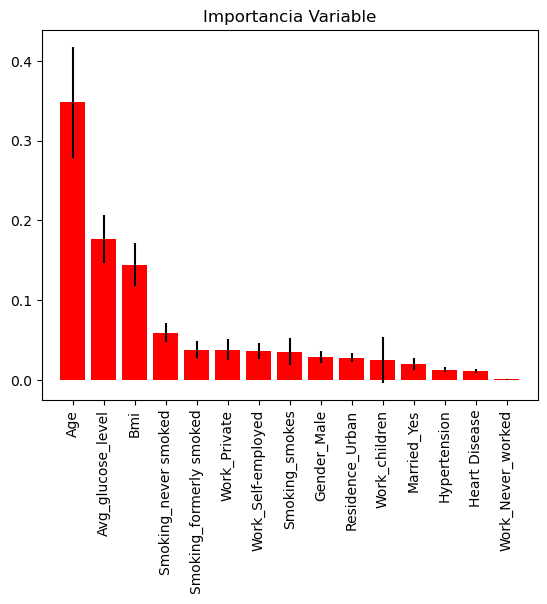

In [84]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the random forest classifier on the data
x = dfs.drop('Stroke', axis=1)
y = dfs['Stroke']
rf.fit(x, y)

# Plot feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Importancia Variable")
plt.bar(range(x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices], rotation='vertical')
plt.xlim([-1, x.shape[1]])
plt.show()

In [85]:
#Las variables predicitvas más importantes son: Age, Avg_glucose_level, BMI y Smoking_never smoked

### REFERENCIAS 

Baldeón, G. (2023). Código de Python aprendido en clases. Analítica de Datos IIN 3007. NRC: 2573. Semestre: 202220. Ingeniería Industrial. Universidad San Francisco de Quito.

De Los Datos, E. M. (2021, June 5). Identificación e imputación de valores perdidos en Python. El Mundo De Los Datos. https://elmundodelosdatos.com/identificacion-valores-perdidos-python/

GeeksforGeeks. (2022, May 17). Visualize Graphs in Python. https://www.geeksforgeeks.org/visualize-graphs-in-python/ 

Genç, B., & Tunc, H. (2019). Optimal training and test sets design for machine learning. Turkish Journal of Electrical Engineering and Computer Sciences, 1534–1545. https://doi.org/10.3906/elk-1807-212 
Holtz, Y. (n.d.). Python Graph Gallery | The Python Graph Gallery. The Python Graph Gallery. https://python-graph-gallery.com/

How to plot binary vs. categorical (nominal) data? (n.d.). Cross Validated. https://stats.stackexchange.com/questions/520731/how-toplot-binary-vs-categorical-nominal-data 

How to split data into 3 sets (train, validation and test)? (n.d.). Stack Overflow. https://stackoverflow.com/questions/38250710/how-tosplit-data-into-3-sets-train-validation-and-test

Matplotlib — Visualization with Python. (n.d.). https://matplotlib.org/  Mayank, M. (2021, December 28). Visualizing Networks in Python - Towards Data Science. Medium. https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259

Mohammed, R., Rawashdeh, J., & Abdullah, M. (2020). Machine Learning with Oversampling and Undersampling Techniques: Overview Study and Experimental Results. 2020 11th International Conference on Information and Communication Systems(ICICS). https://doi.org/10.1109/icics49469.2020.239556

Rodó, P. (2021, January 12). Distribución de Bernoulli. Economipedia. https://economipedia.com/definiciones/distribucion-de-bernoulli.html

Scribbr. (2021, December 2). When should I remove an outlierfrom my dataset? https://www.scribbr.com/frequently-asked-questions/when-to-remove-anoutlier/

Shumeiko, D., & Rozora, I. (2021). Handling Missing Values in Machine Learning Regression Problems. Taras Shevchenko National University of Kyiv, 60 Volodymyrska Str., 01601 Kyiv, Ukraine, 3106, ceur-ws.org. https://ceur-ws.org/Vol-3106/Short_5.pdf

sklearn.linear_model.LogisticRegression. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

Stojiljković, M. (2022, September 1). Logistic Regression in Python. https://realpython.com/logistic-regression-python

Liashchynskyi, P., & Liashchynskyi, P. (2019). Grid search, random search, genetic algorithm: a big comparison for NAS. arXiv preprint arXiv:1912.06059.

Schonlau, M., & Zou, R. Y. (2020). The random forest algorithm for statistical learning. The Stata Journal, 20(1), 3-29.

Breiman, L. (1996). Bagging predictors. Machine learning, 24, 123-140.

